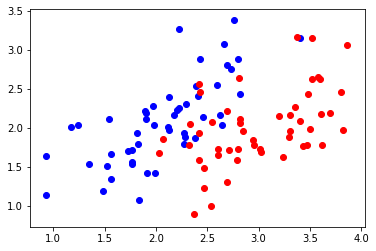

In [1]:
#generated data 
import numpy as np
from matplotlib import pyplot as plt

means = [[2, 2], [3, 2]]
cov = [[.3, 0.2], [0.2, .3]]
N =50
x0=np.random.multivariate_normal(means[0],cov,N)
x1=np.random.multivariate_normal(means[1],cov,N)

X=np.concatenate((x0.T,x1.T),axis=1)
y=np.concatenate((np.ones((1,N)),-1*np.ones((1,N))),axis=1)

plt.scatter(x0[:,0],x0[:,1],color='blue')
plt.scatter(x1[:,0],x1[:,1],color='red')
plt.show()

[[-4.17691654]
 [ 2.36599089]]
[ 0.00e+00]



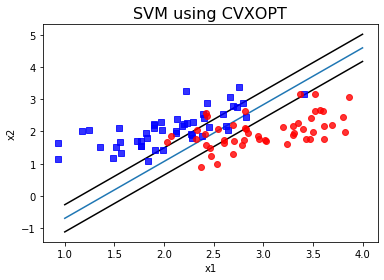

In [4]:
#using CVXOPT lib distribute by Stanford university
from cvxopt import solvers, matrix
# Quadratic programming problem
# x= argmin 1/2*X.T*K*X+q.T*X+b

#     condition: G*X<=h
#                AX=b
#     K is a positive half-square matrix (satisfied the convex condition)
#     G is matrix with shape(m*n)
#     A is matrix with shape (p*n)
#     """

#     """
#     Soft margin Support Vector Machine 
#     loss function: lamda=argmax(-1/2*lamda.T*K*lamda+lamda)
#     condition: 0<= lamda i-th <Cwith 0<=i<=2n
#                y.T*lamda=0
#     lamda i-th>=0 with 0<=i<2*n
#     lamda is n-array with shape (2n,1)

V=np.concatenate((x0.T,-x1.T),axis=1)
K=matrix(V.T.dot(V))
q=matrix(-np.ones((2*N,1)))

#condition
#0<=lamda<c
c=100
G=matrix(np.vstack((-np.eye(2*N),np.eye(2*N))))
h=matrix(np.vstack((np.zeros((2*N,1)),c*np.ones((2*N,1)))))
A=matrix(y)
b=matrix(np.zeros((1,1)))
solvers.options['show_progress']=False
sol=solvers.qp(K,q,G,h,A,b)
lamda=np.array(sol['x'])
#print(lamda.T)

#0<lamda<=c
S=np.where((lamda>1e-6)==True)[0]
temp=np.where((lamda<0.99999*c)==True)[0]
#0<lamda<c
M=[var for var in S if var in temp]
lamda_S=lamda[S]
V_S=V[:,S]
w1=V_S.dot(lamda_S)
print(w1)
X_m=X[:,M]
y_m=y[0,M]

b1=np.mean(y_m.T-w1.T.dot(X_m))
print(b)

visualization_result(x0,x1,w1.T,b1,"SVM using CVXOPT")

[[-4.5307504 ]
 [ 2.50408686]]
[5.86649674]


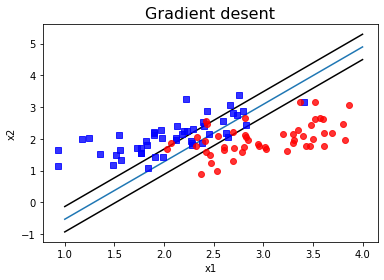

In [5]:
#using hinge loss (gradient desent)
x0_bar=np.concatenate((x0.T,np.ones((1,N))),axis=0)
x1_bar=np.concatenate((x1.T,np.ones((1,N))),axis=0)
z=np.hstack((x0_bar,-x1_bar))
lamda=1/c

def delta(w):
    u=w.T.dot(z)
    H=np.where((u<1)==True)[1]
    z_h=z[:,H]
    g=(-np.sum(z_h,axis=1,keepdims=True))+lamda*w
    g[-1]-=lamda*w[-1]
    return g

def gradient_desent(w_init):
    w=w_init
    iterations=0
    while iterations<1000000:
        iterations+=1
        w-=lamda*delta(w)
        if np.linalg.norm(delta(w))<1e-5:
            break
    return w
        
    
    
    
w_init=np.random.rand(x0.shape[1]+1,1)
w_and_b=gradient_desent(w_init)
w=w_and_b[:-1]
b=w_and_b[-1]
print(w)
print(b)
visualization_result(x0,x1,w.T,b,"Gradient desent")

[[-4.05037928  2.40649209]]
[5.3126989]


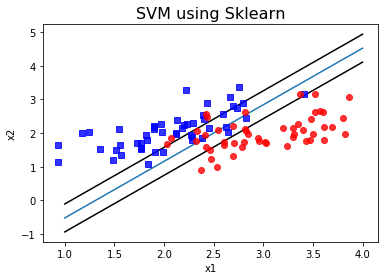

In [7]:
#using sklearn lib
from sklearn.svm import SVC
x_,y_=X.T,y.reshape((2*N,))
model=SVC(kernel="linear",C=1e5)
model.fit(x_,y_)
w=model.coef_
b=model.intercept_
print(w)
print(b)
title="SVM using Sklearn"
visualization_result(x0,x1,w,b,title)

In [3]:
def visualization_result(x0,x1,w,b,title):
    fig,ax=plt.subplots()
    x=np.linspace(1,4,100)
    w1,w2=w[0,0],w[0,1]
    y=-w1/w2*x-b/w2
    y1=-w1/w2*x-(b-1)/w2
    y2=-w1/w2*x-(b+1)/w2
    plt.plot(x,y)
    plt.plot(x,y1,'k')
    plt.plot(x,y2,'k')
    
    plt.plot(x0[:, 0], x0[:, 1], 'bs', markersize=6, alpha=.8)
    plt.plot(x1[:, 0], x1[:, 1], 'ro', markersize=6, alpha=.8)
    plt.title(title,fontsize=16)
#     for i in S:
#         circle=plt.Circle(X[0,i],X[1,i],0.2,color='k',fill=False)
#         ax.add_artist(circle)
        
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()